### SI

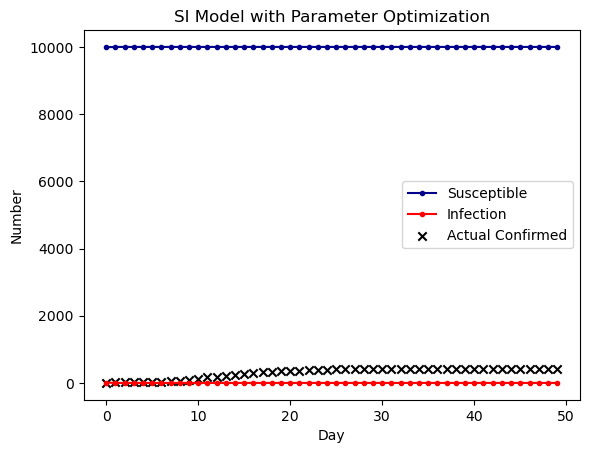

Optimized Transmission Rate (beta): 0.0
Optimized Recovery Rate (gamma): 10.0


In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values
recovered = data['Recovered'].values
deaths = data['Deaths'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
S_0 = N - I_0

# Contact rate (to be optimized)
P = 1

# Transmission rate (to be optimized)
beta = 0.25

# Recovery rate (to be optimized)
gamma = 0

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, I_0)

# Define the SI model
def funcSI(inivalue, _):
    Y = np.zeros(2)
    X = inivalue
    Y[0] = - (P * beta * X[0] * X[1]) / N + gamma * X[1]
    Y[1] = (P * beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, gamma
    beta, gamma = params
    RES = spi.odeint(funcSI, INI, T_range)
    predicted_infected = RES[:, 1]
    return np.sum((predicted_infected - confirmed) ** 2)

# Initial guess for parameters
initial_params = [beta, gamma]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 100), (0, 10)]

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, gamma_optimal = optimal_params

# Simulate the SI model with optimized parameters
RES_optimal = spi.odeint(funcSI, INI, T_range)

# Plot the results
plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='red', label='Infection', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.title('SI Model with Parameter Optimization')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")


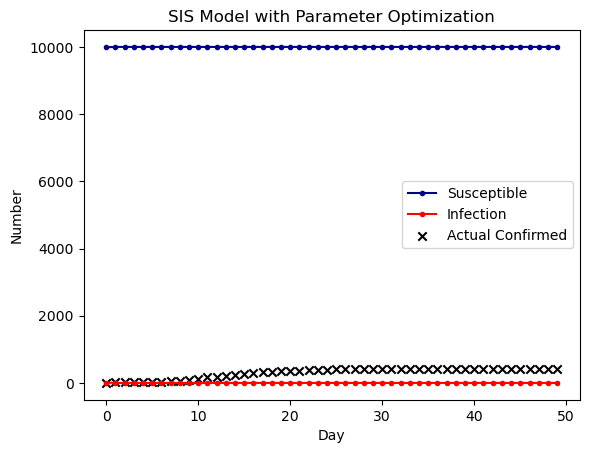

Optimized Transmission Rate (beta): 0.0
Optimized Recovery Rate (gamma): 10.0


In [3]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
S_0 = N - I_0

# Transmission rate (to be optimized)
beta = 0.25

# Recovery rate (to be optimized)
gamma = 0.05

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, I_0)

# Define the SIS model
def funcSIS(inivalue, _):
    Y = np.zeros(2)
    X = inivalue
    Y[0] = - (beta * X[0]) / N * X[1] + gamma * X[1]
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, gamma
    beta, gamma = params
    RES = spi.odeint(funcSIS, INI, T_range)
    predicted_infected = RES[:, 1]
    return np.sum((predicted_infected - confirmed) ** 2)

# Initial guess for parameters
initial_params = [beta, gamma]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 100), (0, 10)]

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, gamma_optimal = optimal_params

# Simulate the SIS model with optimized parameters
RES_optimal = spi.odeint(funcSIS, INI, T_range)

# Plot the results
plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='red', label='Infection', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.title('SIS Model with Parameter Optimization')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")


### SIR

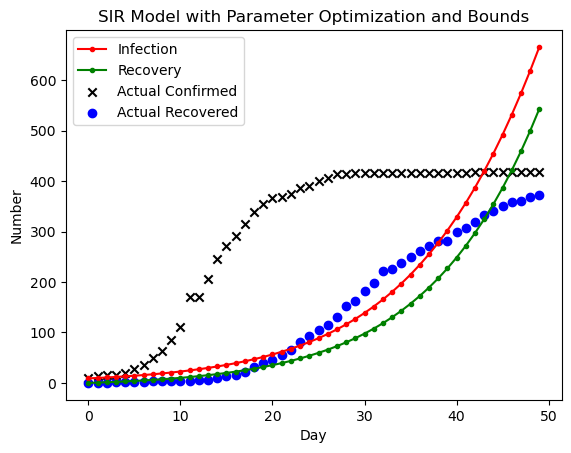

Optimized Transmission Rate (beta): 0.16054600159793492
Optimized Recovery Rate (gamma): 0.06815356027508165


In [7]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values
recovered = data['Recovered'].values
deaths = data['Deaths'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
R_0 = recovered[0]
S_0 = N - I_0 - R_0

# Transmission rate (to be optimized)
beta = 0.25

# Recovery rate (to be optimized)
gamma = 0.05

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, I_0, R_0)

# Define the SIR model
def funcSIR(inivalue, _):
    Y = np.zeros(3)
    X = inivalue
    Y[0] = - (beta * X[0] * X[1]) / N
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    Y[2] = gamma * X[1]
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, gamma
    beta, gamma = params
    RES = spi.odeint(funcSIR, INI, T_range)
    predicted_infected = RES[:, 1]
    predicted_recovered = RES[:, 2]
    return np.sum((predicted_infected - confirmed) ** 2) + np.sum((predicted_recovered - recovered) ** 2)

# Initial guess for parameters
initial_params = [beta, gamma]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 10), (0, 10)]

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, gamma_optimal = optimal_params

# Simulate the SIR model with optimized parameters
RES_optimal = spi.odeint(funcSIR, INI, T_range)

# Plot the results
# plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='red', label='Infection', marker='.')
plt.plot(RES_optimal[:, 2], color='green', label='Recovery', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.scatter(T_range, recovered, color='blue', label='Actual Recovered', marker='o')
plt.title('SIR Model with Parameter Optimization and Bounds')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")


### SIRS

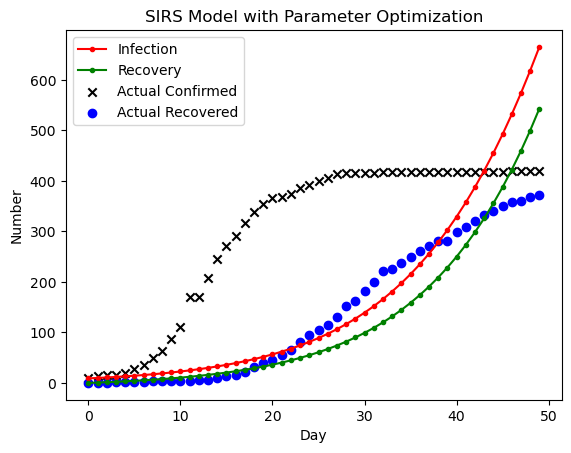

Optimized Transmission Rate (beta): 0.1658741409887928
Optimized Recovery Rate (gamma): 0.07334226182191142
Optimized Antibody Duration (Ts): 139.99999975924223 days


In [26]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values
recovered = data['Recovered'].values
deaths = data['Deaths'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
R_0 = recovered[0]
S_0 = N - I_0 - R_0

# Transmission rate (to be optimized)
beta = 0.25

# Recovery rate (to be optimized)
gamma = 0.05

# Antibody duration (to be optimized)
Ts = 7

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, I_0, R_0)

# Define the SIRS model
def funcSIRS(inivalue, _):
    Y = np.zeros(3)
    X = inivalue
    Y[0] = - (beta * X[0] * X[1]) / N + X[2] / Ts
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    Y[2] = gamma * X[1] - X[2] / Ts
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, gamma, Ts
    beta, gamma, Ts = params
    RES = spi.odeint(funcSIRS, INI, T_range)
    predicted_infected = RES[:, 1]
    predicted_recovered = RES[:, 2]
    return np.sum((predicted_infected - confirmed) ** 2) + np.sum((predicted_recovered - recovered) ** 2)

# Initial guess for parameters
initial_params = [beta, gamma, Ts]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 10), (0, 10), (1, 140)]  # Assuming Ts must be between 1 and 14 days

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, gamma_optimal, Ts_optimal = optimal_params

# Simulate the SIRS model with optimized parameters
RES_optimal = spi.odeint(funcSIRS, INI, T_range)

# Plot the results
# plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='red', label='Infection', marker='.')
plt.plot(RES_optimal[:, 2], color='green', label='Recovery', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.scatter(T_range, recovered, color='blue', label='Actual Recovered', marker='o')
plt.title('SIRS Model with Parameter Optimization')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")
print(f"Optimized Antibody Duration (Ts): {Ts_optimal} days")


### SEIRS-V

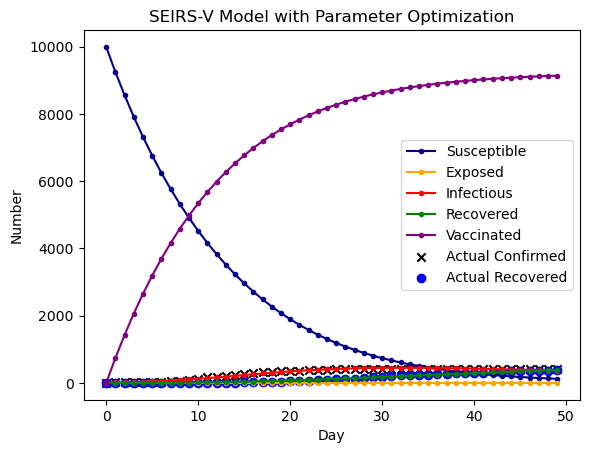

Optimized Transmission Rate (beta): 0.4220295301449761
Optimized Incubation Rate (sigma): 17.999730652078377
Optimized Recovery Rate (gamma): 0.025510094627467925
Optimized Vaccination Rate: 0.07716425227908813


In [24]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values
recovered = data['Recovered'].values
deaths = data['Deaths'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
E_0 = 0
R_0 = recovered[0]
V_0 = 0
S_0 = N - I_0 - E_0 - R_0 - V_0

# Transmission rate (to be optimized)
beta = 0.25

# Incubation rate (to be optimized)
sigma = 0.1

# Recovery rate (to be optimized)
gamma = 0.05

# Vaccination rate (to be optimized)
vaccination_rate = 0.01

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, E_0, I_0, R_0, V_0)

# Define the SEIRS-V model
def funcSEIRSV(inivalue, _):
    Y = np.zeros(5)
    X = inivalue
    Y[0] = -beta * X[0] * X[2] / N - vaccination_rate * X[0]  # Susceptible
    Y[1] = beta * X[0] * X[2] / N - sigma * X[1]  # Exposed
    Y[2] = sigma * X[1] - gamma * X[2]  # Infectious
    Y[3] = gamma * X[2]  # Recovered
    Y[4] = vaccination_rate * X[0]  # Vaccinated
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, sigma, gamma, vaccination_rate
    beta, sigma, gamma, vaccination_rate = params
    RES = spi.odeint(funcSEIRSV, INI, T_range)
    predicted_infected = RES[:, 2]
    predicted_recovered = RES[:, 3]
    return np.sum((predicted_infected - confirmed) ** 2) + np.sum((predicted_recovered - recovered) ** 2)

# Initial guess for parameters
initial_params = [beta, sigma, gamma, vaccination_rate]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 10), (0, 100), (0, 10), (0, 10)]

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, sigma_optimal, gamma_optimal, vaccination_rate_optimal = optimal_params

# Simulate the SEIRS-V model with optimized parameters
RES_optimal = spi.odeint(funcSEIRSV, INI, T_range)

# Plot the results
plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='orange', label='Exposed', marker='.')
plt.plot(RES_optimal[:, 2], color='red', label='Infectious', marker='.')
plt.plot(RES_optimal[:, 3], color='green', label='Recovered', marker='.')
plt.plot(RES_optimal[:, 4], color='purple', label='Vaccinated', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.scatter(T_range, recovered, color='blue', label='Actual Recovered', marker='o')
plt.title('SEIRS-V Model with Parameter Optimization')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Incubation Rate (sigma): {sigma_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")
print(f"Optimized Vaccination Rate: {vaccination_rate_optimal}")


### SIRD

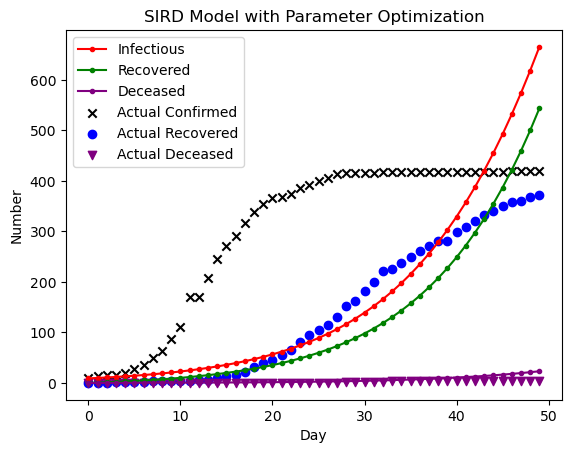

Optimized Transmission Rate (beta): 0.16348999154983174
Optimized Recovery Rate (gamma): 0.06806101775530102
Optimized Mortality Rate (mu): 0.0028913444858452344


In [16]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
confirmed = data['Confirmed'].values
recovered = data['Recovered'].values
deaths = data['Deaths'].values

# Total population
N = 10000

# Initial infected individuals
I_0 = confirmed[0]
R_0 = recovered[0]
D_0 = deaths[0]
S_0 = N - I_0 - R_0 - D_0

# Transmission rate (to be optimized)
beta = 0.25

# Recovery rate (to be optimized)
gamma = 0.05

# Mortality rate (to be optimized)
mu = 0.01

# Time points
T = len(confirmed) - 1
T_range = np.arange(0, T + 1)

# Initial conditions
INI = (S_0, I_0, R_0, D_0)

# Define the SIRD model
def funcSIRD(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    Y[0] = -beta * X[0] * X[1] / N  # Susceptible
    Y[1] = beta * X[0] * X[1] / N - gamma * X[1] - mu * X[1]  # Infectious
    Y[2] = gamma * X[1]  # Recovered
    Y[3] = mu * X[1]  # Deceased
    return Y

# Define the objective function to minimize
def objective(params):
    global beta, gamma, mu
    beta, gamma, mu = params
    RES = spi.odeint(funcSIRD, INI, T_range)
    predicted_infected = RES[:, 1]
    predicted_recovered = RES[:, 2]
    predicted_deceased = RES[:, 3]
    return np.sum((predicted_infected - confirmed) ** 2) + np.sum((predicted_recovered - recovered) ** 2) + np.sum((predicted_deceased - deaths) ** 2)

# Initial guess for parameters
initial_params = [beta, gamma, mu]

# Parameter bounds (within 0 and 10)
parameter_bounds = [(0, 10), (0, 1), (0, 10)]

# Perform optimization with bounds
result = optimization.minimize(objective, initial_params, method='L-BFGS-B', bounds=parameter_bounds)

# Get optimized parameters
optimal_params = result.x
beta_optimal, gamma_optimal, mu_optimal = optimal_params

# Simulate the SIRD model with optimized parameters
RES_optimal = spi.odeint(funcSIRD, INI, T_range)

# Plot the results
# plt.plot(RES_optimal[:, 0], color='darkblue', label='Susceptible', marker='.')
plt.plot(RES_optimal[:, 1], color='red', label='Infectious', marker='.')
plt.plot(RES_optimal[:, 2], color='green', label='Recovered', marker='.')
plt.plot(RES_optimal[:, 3], color='purple', label='Deceased', marker='.')
plt.scatter(T_range, confirmed, color='black', label='Actual Confirmed', marker='x')
plt.scatter(T_range, recovered, color='blue', label='Actual Recovered', marker='o')
plt.scatter(T_range, deaths, color='purple', label='Actual Deceased', marker='v')
plt.title('SIRD Model with Parameter Optimization')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# Display optimized parameters
print(f"Optimized Transmission Rate (beta): {beta_optimal}")
print(f"Optimized Recovery Rate (gamma): {gamma_optimal}")
print(f"Optimized Mortality Rate (mu): {mu_optimal}")
